Convolutional Neural Networks

In [3]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

5.2 Veri Seti hzırlama

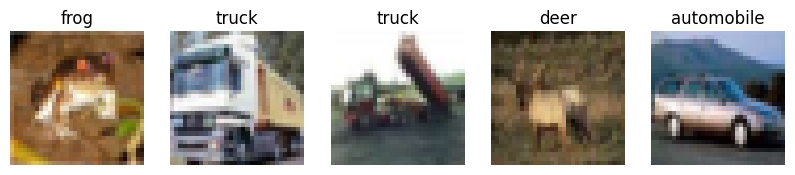

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# görsellestirme
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# bazı görüntüleri ve etiketleri görsellestir
fig, axes = plt.subplots(1,5, figsize=(10,10))

for i in range(5):
    axes[i].imshow(x_train[i])
    axes[i].set_title(class_labels[y_train[i][0]])
    axes[i].axis('off')
plt.show()

# normalize 
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# encoding 
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

5.3 Veri arttırım

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20, #20 derece kadar dondurme saglar
    width_shift_range=0.2, # goruntuyu yatayda %20 kaydırma
    height_shift_range=0.2, # goruntuyu dkeyde %20 kaydırma
    shear_range=0.2, # goruntu üzerinde kaydırma
    zoom_range=0.2, # goruntuyu buyutme
    horizontal_flip=True, # goruntuyu yatayda cevirme
    fill_mode = "nearest" # bos alanları doldurmak için en yakın px degerlerin kullan
)
datagen.fit(x_train) # data aug egiim verileri üzerinde uygula

5.4 Modelin oluşturulması, Derlenmesi ve eğitimi

In [14]:
model = Sequential()
# Feature Extraction
model.add(Conv2D(32, (3,3), padding="same", activation = "relu", input_shape = x_train.shape[1:]))
model.add(Conv2D(32, (3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) # baglantıların %25 ini rastgele kapat

model.add(Conv2D(64, (3,3), padding="same", activation = "relu"))
model.add(Conv2D(64, (3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) 

# Classification
model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Model Derleme
model.compile(loss = "categorical_crossentropy", optimizer = RMSprop(learning_rate=0.0001, decay=1e-6), metrics = ["accuracy"])

# Model Eğitimi
history = model.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 43s 108ms/step - accuracy: 0.6040 - loss: 1.1147 - val_accuracy: 0.6643 - val_loss: 0.9446
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 100ms/step - accuracy: 0.6108 - loss: 1.0978 - val_accuracy: 0.6457 - val_loss: 1.0160
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 95ms/step - accuracy: 0.6118 - loss: 1.0945 - val_accuracy: 0.6501 - val_loss: 0.9908
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 95ms/step - accuracy: 0.6121 - loss: 1.0886 - val_accuracy: 0.6372 - val_loss: 1.0444
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.6169 - loss: 1.0835 - val_accuracy: 0.6601 - val_loss: 0.9623
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 101ms/step - accuracy: 0.6206 - loss: 1.0769 - val_accuracy: 0.6533 - val_loss: 0.9976
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 106ms/step - accuracy: 0.6138 - loss: 1.0770 - val_accuracy: 0.6630 - val_loss: 0.9634
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 106ms/step - accuracy: 0.6220 - loss: 1.06

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
              precision    recall  f1-score   support

    airplane       0.77      0.77      0.77      1000
  automobile       0.74      0.93      0.83      1000
        bird       0.79      0.47      0.59      1000
         cat       0.69      0.42      0.52      1000
        deer       0.75      0.59      0.66      1000
         dog       0.75      0.58      0.66      1000
        frog       0.55      0.93      0.69      1000
       horse       0.77      0.82      0.80      1000
        ship       0.86      0.84      0.85      1000
       truck       0.70      0.89      0.78      1000

    accuracy                           0.72     10000
   macro avg       0.74      0.72      0.71     10000
weighted avg       0.74      0.72      0.71     10000



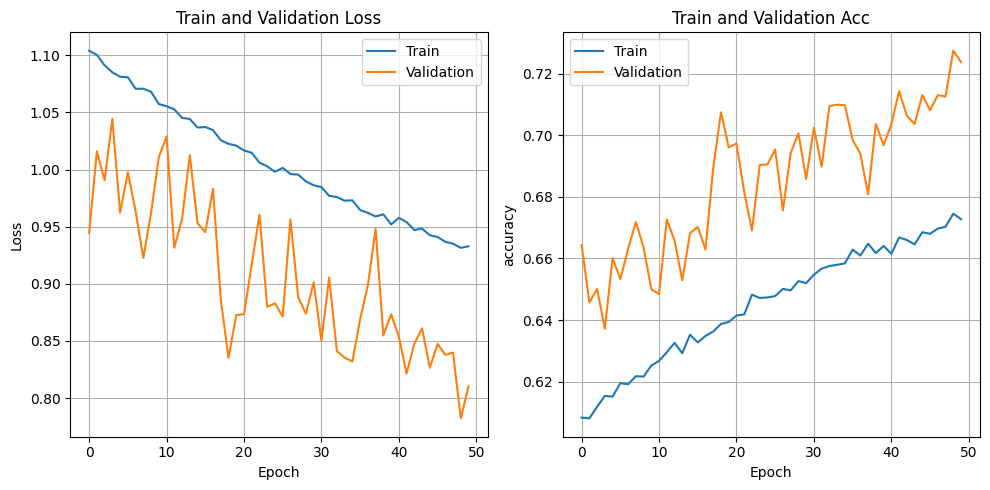

In [21]:
y_pred = model.predict(x_test)
y_pred_clas = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

report = classification_report(y_true, y_pred_clas, target_names=class_labels)
print(report)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Validation")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Validation")
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.title('Train and Validation Acc')
plt.legend()
plt.grid()
plt.tight_layout() 

plt.show()